In [1]:
import sklearn
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LogisticRegression, LinearRegression
import pandas as pd 
import numpy as np 
import matplotlib as plt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
# Loading data

data = pd.read_csv("Data/student-merge.csv")
data = pd.get_dummies(data, drop_first=True)
y = data["Walc"]
X = data.drop(["Dalc","Walc"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1)

In [3]:
feature_names = [atts for atts in X]
class_names = ["1","2","3","4","5"]

In [4]:
# Fitting several regression models to predict y

lm = LinearRegression()
lm_fit = lm.fit(X_train, y_train)

ridge = Ridge()
ridge_fit = ridge.fit(X_train,y_train)

lasso = Lasso(max_iter=1000)
lasso_fit = lasso.fit(X_train,y_train)

ENet = ElasticNet(l1_ratio=.01)
ENet_fit = ENet.fit(X_train,y_train)

preds = [[lm_fit, 'Linear Regression'], [ridge_fit, 'Ridge'], [lasso_fit, 'Lasso'], [ENet_fit, 'ElasticNet']]

# Comparing predicted y to the actual y and calculating the average

default_results = []

for p in preds:
    correct = 0
    print("===== {} =====".format(p[1]))
    print()
    for i in range(len(X_test)):
        a = p[0].predict([X_test.iloc[i]])
        msg = ""
        # The predicted values are rounded since they need to be either 1, 2, 3, 4 or 5
        if y_test.values[i] == np.around(a[0]):
            msg = "=====CORRECT====="
            correct += 1
        print("Actual= {} - Predict= {} {}".format(y_test.values[i],round(a[0],2), msg))
    print()
    print("{} had an accuracy of {}".format(p[1], correct/len(X_test)))
    default_results.append([p[1], correct/len(X_test)])
    print()
        


===== Linear Regression =====

Actual= 1 - Predict= 1.3 =====CORRECT=====
Actual= 2 - Predict= 2.73 
Actual= 3 - Predict= 1.56 
Actual= 1 - Predict= 1.57 
Actual= 1 - Predict= 2.61 
Actual= 2 - Predict= 1.33 
Actual= 2 - Predict= 1.77 =====CORRECT=====
Actual= 4 - Predict= 3.12 
Actual= 1 - Predict= 2.06 
Actual= 1 - Predict= 2.54 
Actual= 1 - Predict= 2.97 
Actual= 1 - Predict= 1.71 
Actual= 1 - Predict= 2.73 
Actual= 3 - Predict= 3.05 =====CORRECT=====
Actual= 1 - Predict= 2.97 
Actual= 3 - Predict= 2.01 
Actual= 5 - Predict= 3.98 
Actual= 3 - Predict= 3.16 =====CORRECT=====
Actual= 4 - Predict= 3.21 
Actual= 1 - Predict= 1.94 
Actual= 1 - Predict= 2.19 
Actual= 1 - Predict= 1.99 
Actual= 1 - Predict= 1.47 =====CORRECT=====
Actual= 1 - Predict= 2.4 
Actual= 3 - Predict= 2.9 =====CORRECT=====
Actual= 2 - Predict= 2.99 
Actual= 4 - Predict= 2.59 
Actual= 1 - Predict= 1.38 =====CORRECT=====
Actual= 1 - Predict= 2.5 
Actual= 5 - Predict= 3.22 
Actual= 3 - Predict= 2.27 
Actual= 2 - Predi

In [5]:
# Finding optimal parameters for every method

# Linear Regression

grid_params = {
    'fit_intercept': ['True', 'False', 'optional']
}

gs_1 = GridSearchCV(LinearRegression(), grid_params)
gs_1 = gs_1.fit(X, y)
print("Best hyperparameter: fit_intercept: {}\n".format(gs_1.best_params_.get('fit_intercept')))

# Ridge

grid_params = {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}

gs_1 = GridSearchCV(Ridge(), grid_params)
gs_1 = gs_1.fit(X, y)
print("Best hyperparameter: solver: {}\n".format(gs_1.best_params_.get('solver')))

# Lasso

grid_params = {
    'normalize': [True, False, 'optional'] 
}

gs_1 = GridSearchCV(Lasso(), grid_params)
gs_1 = gs_1.fit(X, y)
print("Best hyperparameter: normalize: {}\n".format(gs_1.best_params_.get('normalize')))

# ElasticNet

grid_params = {
    'normalize': [True, False, 'optional'] 
}

gs_1 = GridSearchCV(ElasticNet(), grid_params)
gs_1 = gs_1.fit(X, y)
print("Best hyperparameter: normalize: {}\n".format(gs_1.best_params_.get('normalize')))


Best hyperparameter: fit_intercept: True

Best hyperparameter: solver: lsqr

Best hyperparameter: normalize: False

Best hyperparameter: normalize: False



In [6]:
# Predictions with optimal parameters

lm = LinearRegression()
lm_fit = lm.fit(X_train, y_train)

ridge = Ridge(solver='lsqr')
ridge_fit = ridge.fit(X_train,y_train)

lasso = Lasso(max_iter=1000, normalize=False)
lasso_fit = lasso.fit(X_train,y_train)

ENet = ElasticNet(l1_ratio=.01, normalize=False)
ENet_fit = ENet.fit(X_train,y_train)

preds = [[lm_fit, 'Linear Regression'], [ridge_fit, 'Ridge'], [lasso_fit, 'Lasso'], [ENet_fit, 'ElasticNet']]


# Comparing predicted y to the actual y and calculating the average

param_results  = []

for p in preds:
    correct = 0
    print("===== {} =====".format(p[1]))
    print()
    for i in range(len(X_test)):
        a = p[0].predict([X_test.iloc[i]])
        msg = ""
        # The predicted values are rounded since they need to be either 1, 2, 3, 4 or 5
        if y_test.values[i] == np.around(a[0]):
            msg = "=====CORRECT====="
            correct += 1
        print("Actual= {} - Predict= {} {}".format(y_test.values[i],round(a[0],2), msg))
    print()
    print("{} had an accuracy of {}".format(p[1], correct/len(X_test)))
    param_results.append([p[1], correct/len(X_test)])
    print()
    

===== Linear Regression =====

Actual= 1 - Predict= 1.3 =====CORRECT=====
Actual= 2 - Predict= 2.73 
Actual= 3 - Predict= 1.56 
Actual= 1 - Predict= 1.57 
Actual= 1 - Predict= 2.61 
Actual= 2 - Predict= 1.33 
Actual= 2 - Predict= 1.77 =====CORRECT=====
Actual= 4 - Predict= 3.12 
Actual= 1 - Predict= 2.06 
Actual= 1 - Predict= 2.54 
Actual= 1 - Predict= 2.97 
Actual= 1 - Predict= 1.71 
Actual= 1 - Predict= 2.73 
Actual= 3 - Predict= 3.05 =====CORRECT=====
Actual= 1 - Predict= 2.97 
Actual= 3 - Predict= 2.01 
Actual= 5 - Predict= 3.98 
Actual= 3 - Predict= 3.16 =====CORRECT=====
Actual= 4 - Predict= 3.21 
Actual= 1 - Predict= 1.94 
Actual= 1 - Predict= 2.19 
Actual= 1 - Predict= 1.99 
Actual= 1 - Predict= 1.47 =====CORRECT=====
Actual= 1 - Predict= 2.4 
Actual= 3 - Predict= 2.9 =====CORRECT=====
Actual= 2 - Predict= 2.99 
Actual= 4 - Predict= 2.59 
Actual= 1 - Predict= 1.38 =====CORRECT=====
Actual= 1 - Predict= 2.5 
Actual= 5 - Predict= 3.22 
Actual= 3 - Predict= 2.27 
Actual= 2 - Predi

Actual= 4 - Predict= 2.29 
Actual= 1 - Predict= 2.28 
Actual= 2 - Predict= 2.28 =====CORRECT=====
Actual= 2 - Predict= 2.33 =====CORRECT=====
Actual= 3 - Predict= 2.29 
Actual= 1 - Predict= 2.3 
Actual= 2 - Predict= 2.29 =====CORRECT=====
Actual= 1 - Predict= 2.28 
Actual= 2 - Predict= 2.3 =====CORRECT=====
Actual= 2 - Predict= 2.28 =====CORRECT=====
Actual= 1 - Predict= 2.28 
Actual= 1 - Predict= 2.28 
Actual= 1 - Predict= 2.28 
Actual= 3 - Predict= 2.29 
Actual= 3 - Predict= 2.29 
Actual= 1 - Predict= 2.38 
Actual= 1 - Predict= 2.28 
Actual= 2 - Predict= 2.32 =====CORRECT=====
Actual= 2 - Predict= 2.28 =====CORRECT=====
Actual= 3 - Predict= 2.28 
Actual= 5 - Predict= 2.28 
Actual= 1 - Predict= 2.28 
Actual= 2 - Predict= 2.28 =====CORRECT=====
Actual= 1 - Predict= 2.36 
Actual= 1 - Predict= 2.31 
Actual= 1 - Predict= 2.28 
Actual= 3 - Predict= 2.33 
Actual= 2 - Predict= 2.29 =====CORRECT=====
Actual= 1 - Predict= 2.32 
Actual= 1 - Predict= 2.28 
Actual= 2 - Predict= 2.29 =====CORRECT=

In [7]:
# Comparing results

for a, b in zip(default_results, param_results):
    print("Default parameters  -  " + str(a))
    print("Tuned parameters  -  " + str(b))
    print()


Default parameters  -  ['Linear Regression', 0.3619047619047619]
Tuned parameters  -  ['Linear Regression', 0.3619047619047619]

Default parameters  -  ['Ridge', 0.3619047619047619]
Tuned parameters  -  ['Ridge', 0.3523809523809524]

Default parameters  -  ['Lasso', 0.22857142857142856]
Tuned parameters  -  ['Lasso', 0.22857142857142856]

Default parameters  -  ['ElasticNet', 0.22857142857142856]
Tuned parameters  -  ['ElasticNet', 0.22857142857142856]



In [8]:
# Using only the ten most important features as explained in the EDA

best_features = ['Dalc', 'absences', 'goout','sex_M','sex_F','failures','schoolsup_yes','studytime','G1','G3']
drop = []

for f in feature_names:
    if f not in best_features:
        drop.append(f)
        
drop.append('Walc')

X = data.drop(drop,axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1)

# Predicting labels again

lm = LinearRegression()
lm_fit = lm.fit(X_train, y_train)

ridge = Ridge(solver='lsqr')
ridge_fit = ridge.fit(X_train,y_train)

lasso = Lasso(max_iter=1000)
lasso_fit = lasso.fit(X_train,y_train)

ENet = ElasticNet(l1_ratio=.01)
ENet_fit = ENet.fit(X_train,y_train)

preds = [[lm_fit, 'Linear Regression'], [ridge_fit, 'Ridge'], [lasso_fit, 'Lasso'], [ENet_fit, 'ElasticNet']]


# Comparing predicted y to the actual y and calculating the average

best_features_results  = []

for p in preds:
    correct = 0
    print("===== {} =====".format(p[1]))
    print()
    for i in range(len(X_test)):
        a = p[0].predict([X_test.iloc[i]])
        msg = ""
        # The predicted values are rounded since they need to be either 1, 2, 3, 4 or 5
        if y_test.values[i] == np.around(a[0]):
            msg = "=====CORRECT====="
            correct += 1
        print("Actual= {} - Predict= {} {}".format(y_test.values[i],round(a[0],2), msg))
    print()
    print("{} had an accuracy of {}".format(p[1], correct/len(X_test)))
    best_features_results.append([p[1], correct/len(X_test)])
    print()
    

===== Linear Regression =====

Actual= 3 - Predict= 2.51 =====CORRECT=====
Actual= 5 - Predict= 3.63 
Actual= 3 - Predict= 2.33 
Actual= 1 - Predict= 1.34 =====CORRECT=====
Actual= 2 - Predict= 3.19 
Actual= 2 - Predict= 1.21 
Actual= 3 - Predict= 2.28 
Actual= 1 - Predict= 2.04 
Actual= 5 - Predict= 3.71 
Actual= 2 - Predict= 1.7 =====CORRECT=====
Actual= 4 - Predict= 3.75 =====CORRECT=====
Actual= 4 - Predict= 4.01 =====CORRECT=====
Actual= 5 - Predict= 2.64 
Actual= 3 - Predict= 3.62 
Actual= 2 - Predict= 2.71 
Actual= 3 - Predict= 3.43 =====CORRECT=====
Actual= 1 - Predict= 2.17 
Actual= 5 - Predict= 2.6 
Actual= 1 - Predict= 1.07 =====CORRECT=====
Actual= 3 - Predict= 1.97 
Actual= 3 - Predict= 2.14 
Actual= 5 - Predict= 2.27 
Actual= 5 - Predict= 3.74 
Actual= 3 - Predict= 3.66 
Actual= 2 - Predict= 2.31 =====CORRECT=====
Actual= 1 - Predict= 1.3 =====CORRECT=====
Actual= 1 - Predict= 1.3 =====CORRECT=====
Actual= 1 - Predict= 1.4 =====CORRECT=====
Actual= 4 - Predict= 3.23 
Actu

Actual= 5 - Predict= 3.02 
Actual= 2 - Predict= 1.87 =====CORRECT=====
Actual= 4 - Predict= 3.02 
Actual= 4 - Predict= 3.13 
Actual= 5 - Predict= 2.55 
Actual= 3 - Predict= 2.95 =====CORRECT=====
Actual= 2 - Predict= 2.6 
Actual= 3 - Predict= 2.76 =====CORRECT=====
Actual= 1 - Predict= 2.1 
Actual= 5 - Predict= 2.29 
Actual= 1 - Predict= 1.38 =====CORRECT=====
Actual= 3 - Predict= 2.15 
Actual= 3 - Predict= 2.12 
Actual= 5 - Predict= 2.27 
Actual= 5 - Predict= 3.11 
Actual= 3 - Predict= 2.81 =====CORRECT=====
Actual= 2 - Predict= 2.37 =====CORRECT=====
Actual= 1 - Predict= 1.79 
Actual= 1 - Predict= 1.66 
Actual= 1 - Predict= 2.03 
Actual= 4 - Predict= 2.99 
Actual= 1 - Predict= 1.98 
Actual= 1 - Predict= 2.25 
Actual= 2 - Predict= 1.81 =====CORRECT=====
Actual= 1 - Predict= 1.71 
Actual= 2 - Predict= 2.53 
Actual= 2 - Predict= 1.74 =====CORRECT=====
Actual= 2 - Predict= 2.57 
Actual= 1 - Predict= 1.68 
Actual= 1 - Predict= 1.42 =====CORRECT=====
Actual= 1 - Predict= 1.97 
Actual= 2 - 

In [9]:
# Comparing results

for a, b, c in zip(default_results, param_results, best_features_results):
    print("Default parameters  -  " + str(a))
    print("Tuned parameters  -  " + str(b))
    print("Selected features  -  " + str(c))
    print()

# R2 scores
for p in preds:
    r2 = r2_score(y_test.values, p[0].predict(X_test))
    print("{} R2 score: {}".format(p[1], r2))


Default parameters  -  ['Linear Regression', 0.3619047619047619]
Tuned parameters  -  ['Linear Regression', 0.3619047619047619]
Selected features  -  ['Linear Regression', 0.3523809523809524]

Default parameters  -  ['Ridge', 0.3619047619047619]
Tuned parameters  -  ['Ridge', 0.3523809523809524]
Selected features  -  ['Ridge', 0.3523809523809524]

Default parameters  -  ['Lasso', 0.22857142857142856]
Tuned parameters  -  ['Lasso', 0.22857142857142856]
Selected features  -  ['Lasso', 0.17142857142857143]

Default parameters  -  ['ElasticNet', 0.22857142857142856]
Tuned parameters  -  ['ElasticNet', 0.22857142857142856]
Selected features  -  ['ElasticNet', 0.23809523809523808]

Linear Regression R2 score: 0.5358710947111145
Ridge R2 score: 0.53740326732201
Lasso R2 score: 0.001100118446442977
ElasticNet R2 score: 0.378939335365463


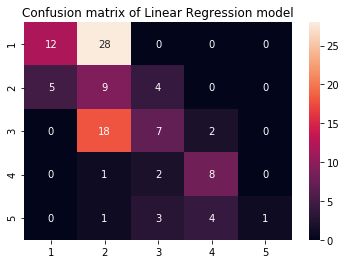

In [10]:
# Creating a confusion matrix

pred_models = [[lm, 'Linear Regression'], [ridge, 'Ridge'], [lasso, 'Lasso'], [ENet, 'ElasticNet']]

def plot_heatmap(model):
    predict = model[0].predict(X_test)
    
    cm = confusion_matrix(y_test.values, np.around(predict))

    df_cm = pd.DataFrame(cm, index = [i for i in class_names],
                      columns = [i for i in class_names])

    confmat = sns.heatmap(df_cm, annot=True)
    
    confmat.set_title('Confusion matrix of {} model'.format(model[1]))
    
    
plot_heatmap(pred_models[0])

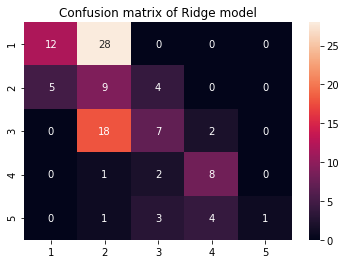

In [11]:
plot_heatmap(pred_models[1])

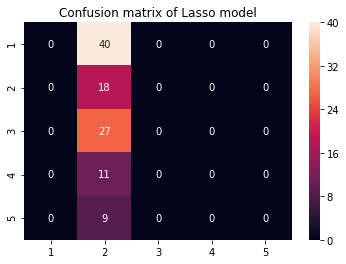

In [12]:
plot_heatmap(pred_models[2])

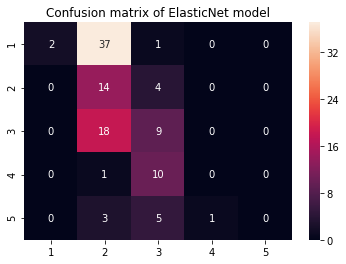

In [13]:
plot_heatmap(pred_models[3])